In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Read the file header
The file header is 4096 bytes of ASCII describing the rest of the binary data in the file

In [2]:
filename = 'J1939_plus_2134_1152MHz.dada'
headerSize = 4096
printHeader = True
hdr = {}
fh = open(filename, 'rb')
headerBuf = fh.read(headerSize)
headerBuf = headerBuf.decode('utf-8')
for line in headerBuf.split('\n'):
    try:
        k, v = line.split(None, 1) # splits each line in the header
        hdr[k] = v # first part of each line in header is the key, other is the value for the dict
    except ValueError:
        pass

if(printHeader == True):
    print('HEADER INFO:')    
    for key, val in hdr.items():
        print(key, ':', val)

HEADER INFO:
BACKEND_PHASE : -1
BW : 128
BYTES_PER_SECOND : 1024000000.0
DATA_HOST : 10.17.1.1
DATA_PORT : 17203
DSB : 1
ENCODING : OFFSETBINARY
ENDIAN : LITTLE
END_CHANNEL : 2
FREQ : 1152
HDR_SIZE : 4096
HDR_VERSION : 1.0
INSTRUMENT : Medusa
NBIT : 16
NCHAN : 1
NDIM : 2
NPOL : 2
RECEIVER : UWL
RESOLUTION : 16384                  
START_CHANNEL : 2
STREAM_BEAM_ID : 0
STREAM_HOST : medusa-gpu1
STREAM_SUBBAND_ID : 2
TELESCOPE : Parkes
TSAMP : 0.0078125
UDP_NSAMP : 2048
ADAPTIVE_FILTER_EPSILON : 0.1
ADAPTIVE_FILTER_NCHAN : 128
ADAPTIVE_FILTER_NSAMP : 1024
CALFREQ : 11.123
DEC : +21:34:59.12892
OBSERVER : Andrew
OBS_OFFSET : 0                      
OUTNBIT : 16
PERFORM_BASEBAND : 1
PERFORM_CONTINUUM : 0
PERFORM_FOLD : 0
PERFORM_SEARCH : 0
PERFORM_SPECTRAL_LINE : 0
PERFORM_VLBI : 0
PID : P981
RA : 19:39:38.5612033
SOURCE : J1939+2134
TOBS : 60
UTC_START : 2018-09-01-09:52:55
UTC_STOP : None
FILE_NUMBER : 0                      
FILE_SIZE : 10240000000            
  : 2018-09-01-08:55:26


### Read in the raw data
- Data is 16-bits complex-valued, single polarisation, offset binary encoding
- Alternating real/imaginary values

In [3]:
fs = 128e6 # sample rate in Hz
fc = int(hdr['FREQ'])*1e6 # centre frequency
nSamples = 2048
nBlocks = 200
timeSeries = np.zeros(nSamples * nBlocks,dtype=complex)
dataBufSize = 4*nSamples # size in bytes (samples are complex-values, 16-bits)
for i in range(nBlocks):
    dataBuf = fh.read(dataBufSize)
    data = np.frombuffer(dataBuf, dtype='uint16')
    # the next two lines convert the offset-binary format to Numpy floats
    data = data.astype(np.int32)
    data = (data - (2**15))
    dataCmplx = data[0::2] + 1j*data[1::2]
    timeSeries[i*nSamples:(i+1)*nSamples] = dataCmplx
fh.close()

### Plot the real and imaginary time-series

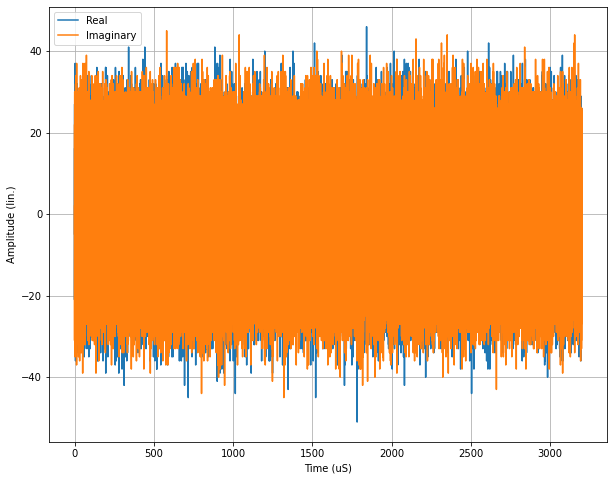

In [4]:
N = len(timeSeries)
Ts = 1/fs # sample period
tmAx = np.arange(N)*Ts
plt.plot(tmAx*1e6, np.real(timeSeries),label='Real')
plt.plot(tmAx*1e6, np.imag(timeSeries),label='Imaginary')
plt.grid()
plt.legend()
plt.xlabel('Time (uS)')
plt.ylabel('Amplitude (lin.)')
pltH = plt.gcf()
pltH.set_size_inches([10, 8])

### Plot the histogram of the real and imaginary components

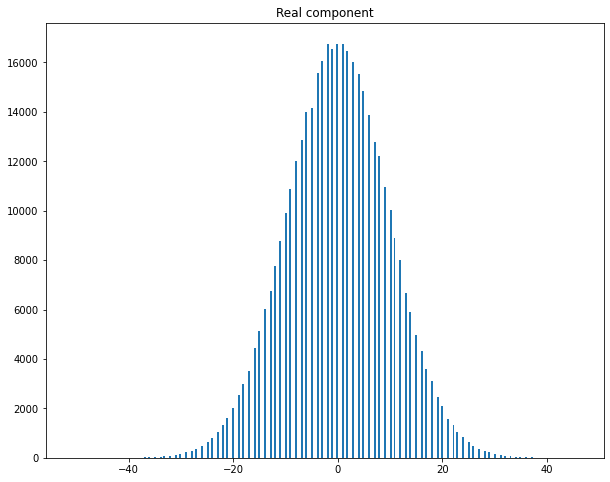

In [5]:
plt.hist(np.real(timeSeries),bins='auto')
plt.title('Real component')
pltH = plt.gcf()
pltH.set_size_inches([10, 8])

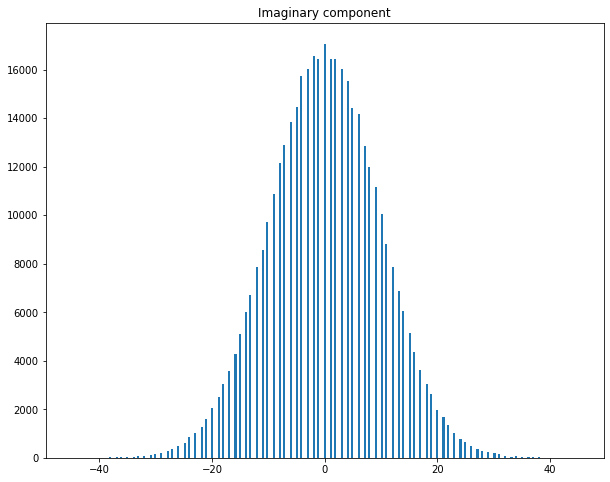

In [6]:
plt.hist(np.imag(timeSeries),bins='auto')
plt.title('Imaginary component')
pltH = plt.gcf()
pltH.set_size_inches([10, 8])